<a href="https://colab.research.google.com/github/Nihal108-bi/Nihal-AI-ML-Practice-Hub/blob/main/Deep_learning_framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.What is TensorFlow 2.0, and how is it different from TensorFlow 1.x?**

Ans:
TensorFlow 2.0 is a major update to TensorFlow, Google's open-source machine learning library, designed to simplify the framework and make it more intuitive and user-friendly. TensorFlow 2.0 introduces significant changes compared to TensorFlow 1.x, addressing some of the complexities and usability challenges of the earlier version.

---

### **Key Features of TensorFlow 2.0**
1. **Eager Execution Enabled by Default**:
   - TensorFlow 2.0 uses *eager execution* as the default mode, allowing immediate evaluation of operations, which makes debugging and development easier. In TensorFlow 1.x, users had to build a computational graph and then execute it in a session.

2. **Simplified API**:
   - The API is more user-friendly and Pythonic.
   - Redundant and outdated APIs (e.g., `tf.app`, `tf.flags`, `tf.contrib`) have been removed.
   - Core functionality is consolidated under fewer modules, such as `tf.keras` for high-level APIs and `tf.data` for data handling.

3. **Integration with Keras**:
   - TensorFlow 2.0 fully integrates Keras (`tf.keras`) as its high-level API, making it easier to build and train deep learning models.
   - This eliminates the need for separate Keras installations.

4. **Autograph and `@tf.function`**:
   - The `@tf.function` decorator automatically converts Python functions into TensorFlow graphs for performance optimization. This bridges the gap between eager execution and graph execution.

5. **Improved Model Building**:
   - TensorFlow 2.0 allows for dynamic and interactive model building with support for imperative programming through eager execution.
   - Custom training loops are easier to implement using the `GradientTape` API.

6. **Simplified Distributed Training**:
   - TensorFlow 2.0 simplifies distributed training using strategies like `tf.distribute.MirroredStrategy`, making multi-GPU and multi-node training more accessible.

7. **Better Support for TensorFlow Lite, TensorFlow.js, and TensorFlow Extended (TFX)**:
   - TensorFlow 2.0 improves the deployment pipeline for mobile, web, and production environments.

8. **Enhanced Documentation and Community Support**:
   - TensorFlow 2.0 comes with better documentation, tutorials, and examples.

---

### **Differences Between TensorFlow 2.0 and TensorFlow 1.x**
| **Aspect**                   | **TensorFlow 1.x**                                   | **TensorFlow 2.0**                               |
|------------------------------|-----------------------------------------------------|-------------------------------------------------|
| **Execution Mode**           | Static graph by default; required sessions.         | Eager execution by default; no sessions needed. |
| **Model Building**           | Separate graph construction and execution phases.   | Unified eager and graph execution with `@tf.function`. |
| **High-Level API**           | Limited support for Keras.                          | Fully integrates `tf.keras` as the high-level API. |
| **API Complexity**           | Numerous redundant APIs and submodules.             | Simplified, modular, and Pythonic API.          |
| **Debugging**                | Debugging was complex due to static graphs.         | Easier debugging with eager execution.          |
| **Distributed Training**     | Required manual configuration for multi-GPU setups. | Simplified with `tf.distribute.Strategy`.       |
| **Custom Training Loops**    | Complex to implement.                               | Simplified using `GradientTape`.                |
| **Performance Optimization** | Required manual graph construction.                 | Automatically optimized with `@tf.function`.    |
| **Backward Compatibility**   | Code written in 1.x may break in newer versions.    | Provides a `tf.compat` module for migration.    |



**2.How do you install TensorFlow 2.0 ?**

Ans:
pip install python
python --version

#create a virtural envourment
python -m venv tensorflow_env
#activate the virtual enviourment
tensorflow_env\Scripts\activate
#installing the Tensorflow 2.0
pip install tensorflow
#Import TensorFlow and check the version
import tensorflow as tf
print(tf.__version__)





**3. What is the primary function of the tf.function in TensorFlow 2.0 ?**

The primary function of tf.function in TensorFlow 2.0 is to convert a Python function into a TensorFlow computational graph. This transformation enables faster execution by optimizing the computation and taking advantage of TensorFlow's graph-based execution capabilities, such as parallelism, hardware acceleration (e.g., GPUs/TPUs), and deployment portability.

Key Benefits of tf.function
Performance Optimization:
By converting a Python function into a graph, TensorFlow eliminates the need for repeated interpretation of Python code, resulting in faster execution.

Graph Execution:
Static computational graphs are more efficient and portable than eager execution, making them suitable for large-scale training and deployment.

Cross-Platform Deployment:
Graphs generated by tf.function can be saved, exported, and run on different platforms, such as mobile devices, servers, or edge devices.

Reusable Computation:
Once created, the graph can be reused multiple times without retracing the function.

In [ ]:
import tensorflow as tf
import time

# Without tf.function (Eager Execution)
def add_eager(x, y):
    return x + y

# With tf.function (Graph Execution)
@tf.function
def add_graph(x, y):
    return x + y

x = tf.constant(10)
y = tf.constant(20)

# Measure performance
start = time.time()
for _ in range(10000):
    add_eager(x, y)
print("Eager Execution Time:", time.time() - start)

start = time.time()
for _ in range(10000):
    add_graph(x, y)
print("Graph Execution Time:", time.time() - start)


Eager Execution Time: 2.0690484046936035
Graph Execution Time: 6.978874206542969


**4. What is the purpose of the Model class in TensorFlow 2.0 ?**

The **`Model` class** in TensorFlow 2.0, provided by the `tensorflow.keras` API, is a core component used for creating and managing machine learning models. It is part of TensorFlow's **high-level Keras API** and serves as the foundation for building both simple and complex neural network architectures.

---

### **Purpose of the `Model` Class**
The `Model` class is used to:

1. **Define the Model's Architecture**:  
   It allows you to specify the layers of your neural network and their connections.

2. **Handle Training, Evaluation, and Prediction**:  
   It provides methods for:
   - **Training** the model: `model.fit()`
   - **Evaluating** performance: `model.evaluate()`
   - **Making predictions**: `model.predict()`

3. **Provide Flexibility for Custom Models**:  
   - The `Model` class can be subclassed to define custom forward passes (ideal for advanced use cases).
   - It supports functional and subclassing approaches for building models.

4. **Access Model Utilities**:  
   The class includes tools for:
   - Saving and loading models (`model.save()`, `tf.keras.models.load_model()`).
   - Inspecting the model architecture (`model.summary()`).

5. **Integrate Custom Training and Evaluation Loops**:  
   - You can customize training by overriding the `train_step` method when subclassing the `Model` class.

---

### **How to Use the `Model` Class**

#### **1. Sequential API**
The simplest way to use the `Model` class is via the **Sequential API**:


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define a simple feedforward model
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)


2.Functional API
For more complex architectures, the Functional API leverages the Model class explicitly:

In [ ]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense

# Input layer
inputs = Input(shape=(10,))

# Hidden layer
hidden = Dense(32, activation='relu')(inputs)

# Output layer
outputs = Dense(1, activation='sigmoid')(hidden)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile and train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)


**5. How do you create a neural network using TensorFlow 2.0 ?**

Ans:
Creating a neural network using TensorFlow 2.0 involves defining its architecture, compiling the model, and training it using data. TensorFlow provides tools such as Keras for high-level neural network construction.

Steps to Create a Neural Network
Define the Architecture: Use layers like Dense, Conv2D, LSTM, etc.
Compile the Model: Specify the optimizer, loss function, and metrics.
Train the Model: Use the fit() method on the dataset.
Evaluate and Predict: Use the evaluate() and predict() methods for testing and inference.

Example: Neural Network for Binary Classification

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: Define the Architecture
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),  # Input layer with 10 features
    Dense(16, activation='relu'),                    # Hidden layer
    Dense(1, activation='sigmoid')                   # Output layer for binary classification
])

# Step 2: Compile the Model
model.compile(optimizer='adam',                    # Optimizer
              loss='binary_crossentropy',          # Loss function
              metrics=['accuracy'])                # Metric to monitor

# Step 3: Generate Dummy Data
import numpy as np
X_train = np.random.rand(1000, 10)  # 1000 samples, 10 features
y_train = np.random.randint(2, size=(1000, 1))  # Binary labels

# Step 4: Train the Model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Step 5: Evaluate and Predict
X_test = np.random.rand(200, 10)   # Test data
y_test = np.random.randint(2, size=(200, 1))  # Test labels

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

predictions = model.predict(X_test[:5])
print("Predictions:", predictions)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.4616 - loss: 0.6967
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5419 - loss: 0.6903
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5048 - loss: 0.6913
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5257 - loss: 0.6865
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5300 - loss: 0.6902
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5270 - loss: 0.6875
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5716 - loss: 0.6827
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5412 - loss: 0.6851
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5084 - loss: 0.6889
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5398 - loss: 0.6860
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.4645 - loss: 0.6920
Test Loss: 0.6919811964035034, Test Accuracy: 0.47999998927116394
1/1 ━━━━━━━━━━━━━━━━

**6.What is the importance of Tensor Space in TensorFlow ?**

Ans:

The concept of tensor space in TensorFlow is fundamental because TensorFlow operates on tensors as its core data structure. Understanding tensor space is important for efficiently designing, building, and deploying machine learning models.

What is Tensor Space?
Tensor space refers to the multidimensional space where tensors (mathematical objects similar to arrays) reside. Each tensor has:

Rank: Number of dimensions (e.g., scalar, vector, matrix, etc.).
Shape: Size of the tensor along each dimension.
Data Type: Type of elements stored (e.g., int32, float32, string).
In TensorFlow, all computations—such as addition, multiplication, transformations, and neural network operations—happen in tensor space.

In [ ]:
import tensorflow as tf

# Tensor in a 3-dimensional space
tensor = tf.constant([
    [[1, 2], [3, 4]],
    [[5, 6], [7, 8]]
])
print("Shape:", tensor.shape)


Shape: (2, 2, 2)


**7 .How can TensorBoard be integrated with TensorFlow 2.0 ?**

Ans:
TensorBoard is a powerful visualization tool integrated with TensorFlow that helps monitor and debug machine learning models. It provides insights into metrics such as loss, accuracy, gradients, model architecture, and more during training and evaluation.

Here’s how you can integrate TensorBoard with TensorFlow 2.0:

In [ ]:
import tensorflow as tf
import datetime

# Define log directory
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Define and compile the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Train the model with TensorBoard logging
model.fit(x_train, y_train, epochs=5, callbacks=[tensorboard_callback])

# Launch TensorBoard
# tensorboard --logdir logs/fit


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8779 - loss: 0.4335
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9654 - loss: 0.1202
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9772 - loss: 0.0778
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9826 - loss: 0.0589
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9861 - loss: 0.0446


**8. What is the purpose of TensorFlow Playground ?**

Ans:
**TensorFlow Playground** is an interactive, web-based tool designed to help users visualize and understand how neural networks work. It provides an intuitive interface for experimenting with neural network architectures and observing their behavior on simple datasets.

---

### **Key Purposes of TensorFlow Playground**

1. **Educational Tool**:
   - TensorFlow Playground is primarily designed to teach the basic concepts of neural networks, such as activation functions, layers, neurons, and training dynamics.
   - It allows users to grasp fundamental ideas like overfitting, regularization, and how different hyperparameters affect model performance.

2. **Visualization of Neural Network Operations**:
   - Provides a clear, graphical representation of how data flows through a neural network.
   - Displays real-time visualizations of decision boundaries and how the model learns over epochs.

3. **Hands-On Experimentation**:
   - Users can adjust parameters such as learning rate, activation functions, number of hidden layers, number of neurons per layer, and types of regularization.
   - Enables direct observation of how these changes affect the training process and the resulting decision boundaries.

4. **Quick Prototyping and Intuition Building**:
   - It's a sandbox environment for quickly testing ideas and gaining intuition without requiring coding or computational resources.
   - Useful for understanding which types of neural network architectures work well for specific data distributions.

5. **Introduction to Deep Learning Concepts**:
   - Concepts like gradient descent, loss functions, and optimization are easier to understand when users can see them in action.
   - Helps in visualizing the role of features in learning.

---

### **Key Features**
- **Customizable Neural Network**: Adjust the architecture, such as the number of layers and neurons.
- **Dataset Selection**: Choose from pre-defined datasets (e.g., spiral, clusters, linear) to test models.
- **Real-Time Visualizations**:
  - Decision boundaries and loss progression during training.
  - Visualization of activations in hidden layers.
- **Hyperparameter Tuning**: Modify learning rate, regularization strength, and activation functions.
- **Interactive Interface**: Provides an engaging and simple interface to experiment with neural networks.

---

### **How to Use TensorFlow Playground**
1. Open TensorFlow Playground in a browser: [TensorFlow Playground](https://playground.tensorflow.org/).
2. Select a dataset and configure the network's architecture and hyperparameters.
3. Click the "Run" button to train the neural network and observe:
   - The evolution of decision boundaries.
   - The impact of parameter changes on performance.
4. Experiment with features, like enabling/disabling neurons, to explore their contributions.

---

### **Benefits of TensorFlow Playground**
- **No Setup Required**: Runs entirely in a browser.
- **Interactive Learning**: Great for students and beginners to experiment without needing coding knowledge.
- **Immediate Feedback**: Real-time updates make it easier to connect theory with practice.

---

### **Limitations**
- **Simplified Environment**: Focuses on small, simple datasets, not suitable for complex problems or large-scale data.
- **No Code Integration**: It's a GUI tool, so users don't directly write or export code for real-world applications.

---

TensorFlow Playground is a powerful tool for demystifying neural networks, making it a valuable resource for beginners and educators exploring the foundations of deep learning.

**9.What is Netron, and how is it useful for deep learning models ?**

Ans:
**Netron** is an open-source, cross-platform visualization tool for inspecting and analyzing deep learning, machine learning, and neural network models. It provides a graphical representation of model architecture, which makes it easier to understand and debug models. Netron supports a wide variety of model formats from frameworks like TensorFlow, PyTorch, ONNX, Keras, and more.

---

### **Key Features of Netron**
1. **Visualization of Model Architecture**:
   - Displays the layers, connections, and data flow of a neural network in a clear and intuitive graphical format.
   - Highlights the input and output tensor shapes, making it easier to spot mismatches or errors.

2. **Support for Multiple Frameworks**:
   - Compatible with popular model formats, including:
     - TensorFlow (`.pb`, `.tflite`, `.savedmodel`)
     - PyTorch (`.pt`, `.pth`)
     - ONNX (`.onnx`)
     - Keras (`.h5`)
     - Caffe, MXNet, Core ML, and others.

3. **Cross-Platform**:
   - Available for Windows, macOS, Linux, and as a web application.

4. **Interactive and User-Friendly**:
   - Models can be zoomed, panned, and inspected layer by layer.
   - Provides detailed information about each layer, including type, parameters, and dimensions.

5. **Lightweight and Fast**:
   - Does not require the original training environment or heavy dependencies to inspect models.

---

### **How Netron is Useful for Deep Learning Models**
1. **Understanding Model Architecture**:
   - Helps visualize complex models, making it easier to comprehend the arrangement of layers, operations, and flow of data.

2. **Debugging Models**:
   - Spot potential issues such as mismatched input/output dimensions, incorrect layer configurations, or missing components.

3. **Exploring Pre-Trained Models**:
   - Useful for inspecting third-party or pre-trained models to understand their design before fine-tuning or deployment.

4. **Communication and Collaboration**:
   - Graphical representations of models are easier to share and explain to team members, especially for non-technical stakeholders.

5. **Deployment Preparation**:
   - Ensures the compatibility of models for deployment by verifying input-output shapes and supported operations.

---

### **How to Use Netron**
1. **Installation**:
   - Download and install from the official site: [Netron](https://netron.app).
   - Alternatively, install via Python:  
     ```bash
     pip install netron
     ```

2. **Opening a Model**:
   - Launch Netron and load the model file using the interface or via the command line:  
     ```bash
     netron your_model.onnx
     ```

3. **Inspect the Model**:
   - Explore the architecture, examine layer details, and visualize the data flow.

---

### **Benefits of Using Netron**
- **Simplifies Model Inspection**: Ideal for both beginners and experts to understand model internals.
- **Speeds Up Debugging**: Quickly identify issues in model configurations.
- **Framework-Agnostic**: Works with models from various frameworks without requiring their native environments.


**10 .What is the difference between TensorFlow and PyTorch ?**

Ans:

TensorFlow and PyTorch are two of the most widely used deep learning frameworks. Both offer powerful tools for building and training machine learning models, but they differ significantly in terms of design philosophy, usability, and ecosystem.

---

### **Key Differences Between TensorFlow and PyTorch**

| **Aspect**               | **TensorFlow**                                                                                                   | **PyTorch**                                                                                                    |
|--------------------------|-----------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------|
| **Design Philosophy**    | Declarative (Graph-based execution with static computation graphs).                                              | Imperative (Dynamic computation graphs, more intuitive).                                                      |
| **Ease of Use**          | Steeper learning curve; requires understanding of graphs and sessions (simplified in TensorFlow 2.0).            | Pythonic and beginner-friendly; intuitive for researchers and developers familiar with Python.                |
| **Graph Execution**      | - **Static Graph** (TensorFlow 1.x): Build the computation graph first, then execute.                           - **Eager Execution** (TensorFlow 2.x): Supports dynamic graph similar to PyTorch.                              | Dynamic graph: Allows modification of the computation graph at runtime, enabling flexibility and ease of debugging. |
| **Model Debugging**      | Debugging is harder in TensorFlow 1.x due to static graphs; easier in TensorFlow 2.x with eager execution.        | Debugging is simpler due to dynamic computation graphs and Python integration.                                 |
| **Deployment**           | Strong deployment options with TensorFlow Serving, TensorFlow Lite, and TensorFlow.js.                          | Deployment options are available but not as extensive; TorchServe is available for serving PyTorch models.    |
| **Community and Ecosystem** | Larger ecosystem with support for TensorBoard, TensorFlow Extended (TFX), and pre-trained models in TensorFlow Hub. | Growing community; provides TorchVision, TorchText, and pre-trained models via Torch Hub.                      |
| **Performance**          | Optimized for production with TensorFlow Serving and TPU support.                                               | Comparable performance for research and experimentation; less emphasis on production tools.                   |
| **Popularity**           | Widely adopted in the industry and enterprise settings for production workflows.                                | Widely used in academia and research due to its ease of experimentation and flexibility.                      |
| **Visualization**        | TensorBoard provides extensive visualization tools.                                                             | No built-in visualization tool; integrates well with external tools like Matplotlib.                          |
| **Hardware Support**     | Native TPU support and optimized for GPUs via CUDA.                                                             | Strong GPU support with CUDA, but lacks native TPU integration.                                               |
| **Code Style**           | Requires more boilerplate code, especially in TensorFlow 1.x.                                                   | Code is concise and intuitive, mimicking Python programming style.                                            |
| **Distributed Training** | Offers advanced distributed training strategies out of the box.                                                 | Provides good distributed training options, but TensorFlow has more mature tools.                             |

---

### **Choosing Between TensorFlow and PyTorch**
- **Use TensorFlow if**:
  - You need robust tools for deploying models in production (e.g., TensorFlow Serving or TensorFlow Lite).
  - You're working on large-scale applications where deployment, scalability, and ecosystem support are critical.
  - You want extensive visualization options (e.g., TensorBoard).

- **Use PyTorch if**:
  - You’re focused on research or rapid prototyping.
  - You prefer a more intuitive, Pythonic interface for building and experimenting with models.
  - You value flexibility and dynamic graph execution for debugging or experimenting with complex models.



In [ ]:
#Tensorflow
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#pytorch
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.softmax(self.fc2(x), dim=1)
        return x

model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())


**11. How do you install PyTorch ?**

Ans:
<>For CPU only:

pip install torch torchvision torchaudio

<>For GPU (with CUDA): Replace <CUDA_VERSION> with your desired version (e.g., cu118 for CUDA 11.8).For GPU (with CUDA): Replace <CUDA_VERSION> with your desired version (e.g., cu118 for CUDA 11.8).

pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118



**12. What is the basic structure of a PyTorch neural network ?**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the custom model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(4, 16)  # Input size 4, output size 16
        self.relu = nn.ReLU()       # Activation function
        self.fc2 = nn.Linear(16, 3) # Output size 3 (e.g., for classification)

    def forward(self, x):
        # Define the forward pass
        x = self.fc1(x)    # Input to first layer
        x = self.relu(x)   # Activation
        x = self.fc2(x)    # Output layer
        return x

# Create the model instance
model = SimpleNN()

# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()  # Suitable for classification tasks
optimizer = optim.SGD(model.parameters(), lr=0.01)

#Example training loop
# Example data
inputs = torch.rand(8, 4)  # Batch of 8, 4 features each
labels = torch.randint(0, 3, (8,))  # Random class labels (3 classes)

# Training loop
for epoch in range(5):  # 5 epochs
    # Forward pass
    outputs = model(inputs)
    loss = loss_fn(outputs, labels)

    # Backward pass
    optimizer.zero_grad()  # Reset gradients
    loss.backward()        # Compute gradients
    optimizer.step()       # Update weights

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")


Epoch 1, Loss: 1.265563726425171
Epoch 2, Loss: 1.2608232498168945
Epoch 3, Loss: 1.256190299987793
Epoch 4, Loss: 1.2516611814498901
Epoch 5, Loss: 1.2472325563430786


**14. What is the difference between torch.Tensor and torch.cuda.Tensor in PyTorch ?**

Ans:
The primary difference between `torch.Tensor` and `torch.cuda.Tensor` in PyTorch lies in **where the tensor data is stored and processed**:

### **Key Differences**

| **Aspect**              | **`torch.Tensor` (CPU)**                   | **`torch.cuda.Tensor` (GPU)**                |
|--------------------------|--------------------------------------------|----------------------------------------------|
| **Device**              | CPU (default).                             | GPU (requires CUDA).                         |
| **Performance**         | Slower for large computations.             | Faster for large computations due to GPU parallelism. |
| **Memory Location**     | Stored in system RAM.                      | Stored in GPU memory (VRAM).                 |
| **Device Transfer**     | No explicit transfer needed.               | Requires transferring data to/from GPU.      |
| **Initialization**      | Default type is `torch.FloatTensor`.       | Must specify `device='cuda'` during creation or transfer. |
| **Compatibility**       | Operations cannot mix CPU and GPU tensors. | All involved tensors must be on the same GPU. |



In [ ]:
#>>torch.Tensor
# Represents a CPU tensor by default.
# Data is stored and operations are performed on the CPU.
# It is the default tensor type in PyTorch.
import torch
# Create a tensor on the CPU
tensor_cpu = torch.Tensor([1, 2, 3])
print(tensor_cpu.device)


cpu


In [ ]:
#>> torch.cuda.Tensor
# Represents a GPU tensor.
# Data is stored and operations are performed on the GPU using CUDA.
# These tensors enable faster computation for tasks that can leverage GPU acceleration.
import torch
# Create a tensor on the GPU
tensor_gpu = torch.tensor([1, 2, 3], device='cuda')
print(tensor_gpu.device)



cuda:0


**15 .What is the purpose of the torch.optim module in PyTorch ?**

ans:

The `torch.optim` module in PyTorch provides a collection of optimization algorithms for training machine learning models. Its primary purpose is to **update the parameters (weights) of a model during training** to minimize the loss function, thereby improving the model's performance.

---

### **Key Features of `torch.optim`**
1. **Implements Various Optimization Algorithms**:
   - Popular optimizers like **SGD (Stochastic Gradient Descent)**, **Adam**, **RMSprop**, etc., are included.
   - Each optimizer has specific properties suited for different tasks.

2. **Handles Parameter Updates**:
   - Automatically computes updates for model parameters based on the gradients computed during backpropagation.

3. **Customizable Behavior**:
   - Allows setting hyperparameters such as learning rate (`lr`), momentum, weight decay, etc.

4. **Integrated with Autograd**:
   - Works seamlessly with PyTorch's autograd system to compute gradients and perform updates.

---

### **How `torch.optim` Works**

1. **Initialize the Optimizer**:
   - Define an optimizer and specify the parameters of the model to be optimized.
   - Example:
     ```python
     optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
     ```

2. **Zero the Gradients**:
   - Before performing a new optimization step, gradients must be reset to avoid accumulation.
   - Example:
     ```python
     optimizer.zero_grad()
     ```

3. **Compute Gradients**:
   - Perform forward and backward passes to calculate gradients using the loss function.
   - Example:
     ```python
     loss.backward()
     ```

4. **Update Parameters**:
   - Call `optimizer.step()` to update the model's parameters using the computed gradients.
   - Example:
     ```python
     optimizer.step()
     ```

---

### **Common Optimizers in `torch.optim`**

| **Optimizer** | **Description**                                                                                                  | **Common Hyperparameters**               |
|---------------|------------------------------------------------------------------------------------------------------------------|------------------------------------------|
| **SGD**       | Stochastic Gradient Descent with optional momentum for faster convergence.                                       | `lr`, `momentum`, `weight_decay`         |
| **Adam**      | Adaptive Moment Estimation combines the benefits of AdaGrad and RMSprop.                                         | `lr`, `betas`, `eps`, `weight_decay`     |
| **RMSprop**   | Divides the learning rate by a moving average of recent gradients. Useful for non-stationary objectives.         | `lr`, `alpha`, `eps`, `weight_decay`     |
| **Adagrad**   | Adjusts learning rate for each parameter based on the magnitude of past gradients.                               | `lr`, `lr_decay`, `weight_decay`         |
| **AdamW**     | Variant of Adam with decoupled weight decay for improved regularization.                                         | `lr`, `betas`, `eps`, `weight_decay`     |
| **LBFGS**     | Limited-memory BFGS, a second-order optimization algorithm for smaller datasets and batch sizes.                 | `lr`, `max_iter`, `history_size`         |

---



**16 .What are some common activation functions used in neural networks ?**

Ans:

### **Comparison Table**

| **Activation Function** | **Use Case**                              | **Advantages**                     | **Disadvantages**                 |
|--------------------------|-------------------------------------------|-------------------------------------|------------------------------------|
| Sigmoid                 | Binary classification                    | Probabilistic output               | Vanishing gradient                |
| Tanh                    | Hidden layers in RNNs                    | Zero-centered output               | Vanishing gradient                |
| ReLU                    | Deep CNNs                                | Fast and sparse activations        | Dying ReLU problem                |
| Leaky ReLU              | CNNs with better gradient flow           | Solves dying ReLU problem          | Requires parameter tuning         |
| ELU                     | Deep networks                            | Smooth for negative inputs         | Slower computation                |
| Softmax                 | Multi-class classification               | Converts logits to probabilities   | Sensitive to large logits         |
| Swish                   | Deep learning tasks                      | Non-monotonic, smooth activations  | Computational cost                |
| GELU                    | Transformers, advanced architectures     | Smooth activations                 | Slightly slower than ReLU         |


**17 .What is the difference between torch.nn.Module and torch.nn.Sequential in PyTorch ?**

Ans:
The primary difference between `torch.nn.Module` and `torch.nn.Sequential` lies in how they allow you to define and structure neural network models in PyTorch. Here's a detailed comparison:

---

### **1. `torch.nn.Module`**
- **Definition**:
  - It is the base class for all neural networks in PyTorch.
  - Allows for flexible and custom model design by enabling you to define the forward pass explicitly.

- **Features**:
  - **Custom Forward Pass**:
    - You can define the forward method to control how data flows through the layers.
    - Useful for complex architectures with branching, loops, or shared layers.
  - **Reusable Submodules**:
    - You can organize layers into reusable submodules.
  - **Extensibility**:
    - Suitable for highly customized architectures like GANs, ResNet, etc.


### **2. `torch.nn.Sequential`**
- **Definition**:
  - A simpler, more concise way to stack layers sequentially.
  - Does not require explicitly defining a `forward` method.

- **Features**:
  - **Automatic Forward Pass**:
    - Layers are applied in the order they are defined.
    - No flexibility to control the forward flow beyond sequential application.
  - **Concise and Readable**:
    - Best for simple, feed-forward architectures where layers are applied one after the other.


### **Key Differences**

| Feature                      | `torch.nn.Module`                          | `torch.nn.Sequential`               |
|------------------------------|--------------------------------------------|--------------------------------------|
| **Flexibility**              | Highly flexible; custom forward pass       | Limited to sequential execution      |
| **Use Case**                 | Complex models with branching or shared layers | Simple feed-forward networks         |
| **Reusability**              | Can reuse layers or submodules             | Not reusable; defines a static order |
| **Ease of Use**              | Requires more boilerplate code             | Concise and straightforward          |


**18 .How can you monitor training progress in TensorFlow 2.0 ?**

Ans:

In TensorFlow 2.0, monitoring training progress can be done using various tools and techniques. Here are some common methods:

### 1. **Using `tf.keras.callbacks`**

TensorFlow provides a built-in library of callbacks that can help monitor various aspects of the training process, such as loss, accuracy, and other metrics. The most commonly used callback for monitoring is `TensorBoard`, but others like `EarlyStopping`, `ModelCheckpoint`, etc., are also very useful.



**19. How does the Keras API fit into TensorFlow 2.0 ?**

Ans:

In **TensorFlow 2.0**, the **Keras API** is integrated as the **default high-level API** for building and training machine learning models. Keras provides a user-friendly, modular, and extensible framework for defining and training neural networks, making it easier to work with TensorFlow.

Here’s how Keras fits into TensorFlow 2.0:

### 1. **High-Level Abstraction for Building Models**
   Keras simplifies the creation of deep learning models by providing a high-level interface for defining layers, activation functions, optimizers, and loss functions. It abstracts away many of the complexities of TensorFlow, making it accessible to beginners while still powerful enough for advanced users.

   - **Sequential API**: Keras offers the `Sequential` class for simple, linear stacks of layers. It’s useful for most models that consist of a stack of layers, where each layer has exactly one input tensor and one output tensor.
   - **Functional API**: For more complex models, such as those with multiple inputs or outputs, or shared layers, Keras provides the Functional API. This allows for more flexibility in defining models like multi-input models, residual networks, and models with multiple branches.

### 2. **Integration with TensorFlow 2.0**
   In TensorFlow 2.0, Keras is deeply integrated, making it the default way of building neural networks. The **`tf.keras`** module contains Keras' functionality within TensorFlow itself. This integration allows you to take advantage of TensorFlow’s features (such as `tf.data` for efficient input pipelines, `tf.function` for performance optimization, and distribution strategies for training on multiple devices) seamlessly with Keras.

   For example:
   - **Model Definition**: You define models using the `tf.keras.Model` class or the `tf.keras.Sequential` class.
   - **Loss Functions**: You use TensorFlow's loss functions from `tf.keras.losses`.
   - **Optimizers**: You can use TensorFlow optimizers, like `tf.keras.optimizers.Adam`, for training.
   - **Callbacks**: Keras also supports TensorFlow's callbacks like `tf.keras.callbacks.TensorBoard`, `ModelCheckpoint`, and `EarlyStopping`.

### 3. **Automatic Differentiation and GPU/TPU Support**
   The Keras API in TensorFlow 2.0 takes full advantage of TensorFlow’s powerful features, such as:
   - **Automatic differentiation**: Keras models use TensorFlow’s `tf.GradientTape` under the hood for automatic gradient calculation and backpropagation.
   - **GPU/TPU acceleration**: Keras models can run on multiple GPUs or TPUs with minimal setup by leveraging TensorFlow’s distributed training capabilities.


**20. What is an example of a deep learning project that can be implemented using TensorFlow 2.0 ?**

Ans:

One example of a deep learning project that can be implemented using **TensorFlow 2.0** is a **Image Classification System** using Convolutional Neural Networks (CNNs). In this project, you would build a CNN model to classify images from a dataset like CIFAR-10, which contains 60,000 images in 10 different classes (e.g., airplane, car, bird, etc.).

### Project Overview: Image Classification using CNN with TensorFlow 2.0

#### 1. **Dataset**
   - **CIFAR-10 Dataset**: This dataset is available in TensorFlow and consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class.
   - The classes include:
     - Airplane
     - Automobile
     - Bird
     - Cat
     - Deer
     - Dog
     - Frog
     - Horse
     - Ship
     - Truck


In [ ]:
### 2. Steps for Implementing the Image Classification Project
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
# Load the Dataset: Use TensorFlow to load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
#Normalize the Data: Neural networks typically perform better when the data is normalized (scaled between 0 and 1).
train_images, test_images = train_images / 255.0, test_images / 255.0
#Define the CNN Model: A CNN model will help in extracting spatial features from the images
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])
#steps
# Adding convolutional layers (Conv2D) to learn spatial features.
# Using max-pooling (MaxPooling2D) to reduce dimensionality.
# Flattening the 3D feature map to 1D to feed into a fully connected layer.
# Finally, we output the predictions through a Dense layer (10 units for the 10 classes).
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#Train the Model: You can now train the model using the training data. Set the number of epochs and batch size.
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
#Evaluate the Model: After training, you can evaluate the model's performance on the test dataset.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3445 - loss: 1.7523 - val_accuracy: 0.5502 - val_loss: 1.2590
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.5745 - loss: 1.2005 - val_accuracy: 0.6108 - val_loss: 1.0930
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6366 - loss: 1.0431 - val_accuracy: 0.6366 - val_loss: 1.0266
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6684 - loss: 0.9415 - val_accuracy: 0.6433 - val_loss: 1.0134
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6998 - loss: 0.8568 - val_accuracy: 0.6763 - val_loss: 0.9235
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7195 - loss: 0.8063 - val_accuracy: 0.6930 - val_loss: 0.8898
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7348 - loss: 0.7524 - val_accuracy: 0.7014 - val_loss: 0.8662
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7551 - loss: 0.696

In [ ]:
# Make Predictions:  using the trained model to make predictions on new images.
predictions = model.predict(test_images)
print("Predicted class for the first image:", np.argmax(predictions[0]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted class for the first image: 5


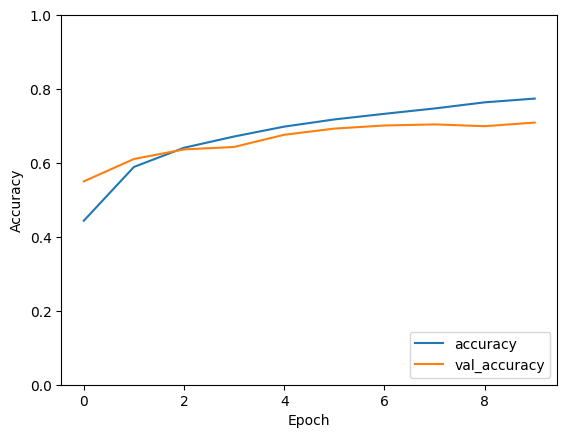

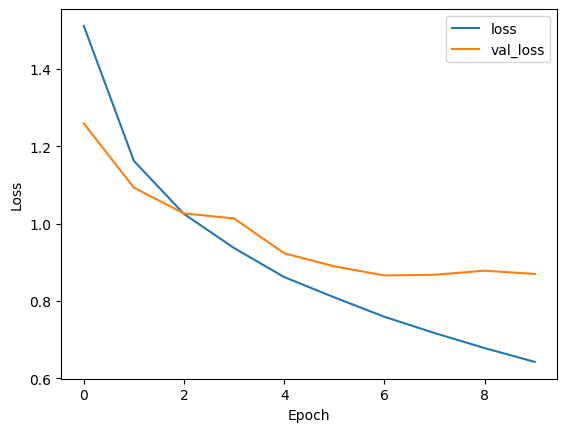

In [ ]:
#Visualize Training Results: It's important to plot the accuracy and loss graphs to monitor the performance of the model during training.
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


**21. What is the main advantage of using pre-trained models in TensorFlow and PyTorch?**

Ans:

The main advantages of using pre-trained models in **TensorFlow** and **PyTorch** are:

### 1. **Faster Training and Convergence**:
   - **Transfer Learning**: Pre-trained models come with weights that have already been trained on large, general datasets (e.g., ImageNet). These weights capture general patterns and features (like edges, textures, shapes), which can be reused in a new task. As a result, you don't need to start training from scratch, and the model can converge much faster.
   - **Reduced Training Time**: Since the model has already learned general features, you only need to fine-tune it for the specific task, reducing the amount of data and time needed to achieve good performance.

### 2. **Improved Performance**:
   - **Generalization**: Pre-trained models are generally trained on large and diverse datasets, which helps them generalize better to new, unseen data. This often results in better performance for small or medium-sized datasets, especially if the new dataset is related to the one used for training the pre-trained model.
   - **Better Results with Less Data**: Fine-tuning a pre-trained model is especially useful when you have limited data. Since the model has already learned features on a large dataset, it can apply those learned features to your smaller dataset.

### 3. **Reduced Computational Resources**:
   - **Less Need for Computing Power**: Training deep neural networks from scratch requires significant computational resources, especially for large networks. Using pre-trained models allows you to bypass the heavy lifting of training, reducing the need for high-end hardware like GPUs or TPUs.
   - **Efficient Use of Available Data**: Pre-trained models allow you to make use of the knowledge embedded in large datasets, which you might not be able to access due to resource limitations.

### 4. **Proven Architectures**:
   - **Well-Established Models**: Pre-trained models are often built using well-researched and proven architectures (e.g., ResNet, VGG, BERT, etc.). These models are designed and tested for generalization, and using them as a starting point ensures you're leveraging effective architectures.
   - **Ready to Use**: Many pre-trained models are available out-of-the-box, meaning you can immediately use them for inference or fine-tuning. This helps in quickly deploying applications without needing to build models from scratch.

### 5. **Community and Ecosystem Support**:
   - **Pre-trained Models in Libraries**: Both TensorFlow and PyTorch provide easy access to many pre-trained models via `tf.keras.applications` and `torchvision.models`. These libraries are widely used, and many have established best practices for how to use and fine-tune pre-trained models.
   - **Wide Adoption**: Since pre-trained models are commonly used across various domains (e.g., computer vision, NLP), they come with extensive documentation, tutorials, and support from the community.

### 6. **Flexibility**:
   - **Fine-tuning and Customization**: Pre-trained models can be adapted to a wide range of tasks through fine-tuning. You can change the last few layers to customize the model for your specific task (e.g., classification, segmentation, etc.). This allows you to quickly adapt state-of-the-art models to your needs.
   - **Flexibility in Layers**: You can also choose to freeze the weights of early layers and only fine-tune the later layers, which speeds up training and reduces the risk of overfitting.

### 7. **Better Use of Limited Data**:
   - **Handling Small Datasets**: Pre-trained models are particularly helpful when you have limited labeled data. By leveraging transfer learning, you can significantly improve the model's performance even with a small amount of data for the specific task.

# Practical

**1.How do you install and verify that TensorFlow 2.0 was installed successfully ?**

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.1


In [ ]:
print("Is TensorFlow using GPU? ", tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Is TensorFlow using GPU?  True


In [ ]:
# Create a simple tensor and perform an operation
a = tf.constant(5)
b = tf.constant(3)
c = a + b

print("Tensor result:", c)  # This will output: Tensor result: 8
print("Tensor result:", c.numpy())


Tensor result: tf.Tensor(8, shape=(), dtype=int32)
Tensor result: 8


**2. How can you define a simple function in TensorFlow 2.0 to perform addition ?**

In [ ]:
import tensorflow as tf
 #define a simple function to add two numbers
@tf.function
def add_numbers(a,b):
  return a+b

#create two tensors(inputs)
x=tf.constant(5)
y=tf.constant(3)

#call the function and print the result
result=add_numbers(x,y)
print("Addition result: ", result)



Addition result:  tf.Tensor(8, shape=(), dtype=int32)


**3. How can you create a simple neural network in TensorFlow 2.0 with one hidden layer ?**

In [ ]:
import numpy as np
X_train=np.random.rand(100,3)
X_train

array([[0.30380419, 0.85852462, 0.38331768],
       [0.79517368, 0.7694111 , 0.45943707],
       [0.12344113, 0.57664778, 0.67851315],
       [0.29565062, 0.28364516, 0.94867712],
       [0.186907  , 0.28205435, 0.83422977],
       [0.01848144, 0.86562863, 0.30446597],
       [0.64062828, 0.9631655 , 0.19512335],
       [0.38909168, 0.43455372, 0.37991392],
       [0.72205675, 0.21370856, 0.44527081],
       [0.00496816, 0.0531973 , 0.86746022],
       [0.43843496, 0.51328333, 0.5848821 ],
       [0.83385198, 0.24110036, 0.99809279],
       [0.70578006, 0.85602698, 0.98938594],
       [0.8260366 , 0.83853815, 0.78215893],
       [0.54009461, 0.85990684, 0.16863241],
       [0.79072461, 0.62372269, 0.84165049],
       [0.31159648, 0.56858087, 0.50422504],
       [0.29152341, 0.59431232, 0.14938169],
       [0.20019397, 0.06043373, 0.20239606],
       [0.38709028, 0.32148284, 0.69018902],
       [0.98258912, 0.22997775, 0.29559946],
       [0.48615127, 0.71270458, 0.78676668],
       [0.

In [ ]:
y_train=np.random.randint(2,size=100)
y_train

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models

#define the model
model=models.Sequential()

#input layer (3 input features)
#first hidden layer with 5 neurans, using relu activation function
model.add(layers.Dense(5,activation='relu',input_shape=(3,)))

#output layer with 1 neuron (for binary classifaction)
model.add(layers.Dense(1,activation='sigmoid'))

#compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
#display the model architecture
model.summary()

#example : generating random data for training
import numpy as np
X_train=np.random.rand(100,3) #100 sample with 3 features
y_train=np.random.randint(2,size=100) #100 binary labels(0 or 1)

#train the model
history=model.fit(X_train,y_train,epochs=10,batch_size=32)

#Example prediction
X_test=np.random.rand(10,3) #10 new samples for testing
predictions=model.predict(X_test)

print("Predictions",predictions)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 5)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26 (104.00 B)

 Trainable params: 26 (104.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.5502 - loss: 0.7004
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5440 - loss: 0.7077  
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5419 - loss: 0.7064 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5658 - loss: 0.6966 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4941 - loss: 0.7142 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5224 - loss: 0.7058 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5464 - loss: 0.6974 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5066 - loss: 0.7124 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5347 - loss: 0.7016 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5077 - loss: 0.7143 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predictions [[0.6523831 ]
 [0.63832474]
 [0.560681  ]
 [0.58653843]
 [0.5710282 ]
 [0.5406406 ]
 [0.6216506 ]
 [0.47532883]
 [0.4

**4. How can you visualize the training progress using TensorFlow and Matplotlib ?**

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4954 - loss: 0.7036 - val_accuracy: 0.4850 - val_loss: 0.7012
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4930 - loss: 0.6972 - val_accuracy: 0.4950 - val_loss: 0.6984
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5131 - loss: 0.6933 - val_accuracy: 0.4800 - val_loss: 0.6991
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5010 - loss: 0.6936 - val_accuracy: 0.4950 - val_loss: 0.6977
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5565 - loss: 0.6900 - val_accuracy: 0.4700 - val_loss: 0.6988
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5600 - loss: 0.6895 - val_accuracy: 0.5000 - val_loss: 0.6982
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5548 - loss: 0.6890 - val_accuracy: 0.4950 - val_loss: 0.6979
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5580 - loss: 0.6893 - val_accuracy: 0.4650 - val_loss

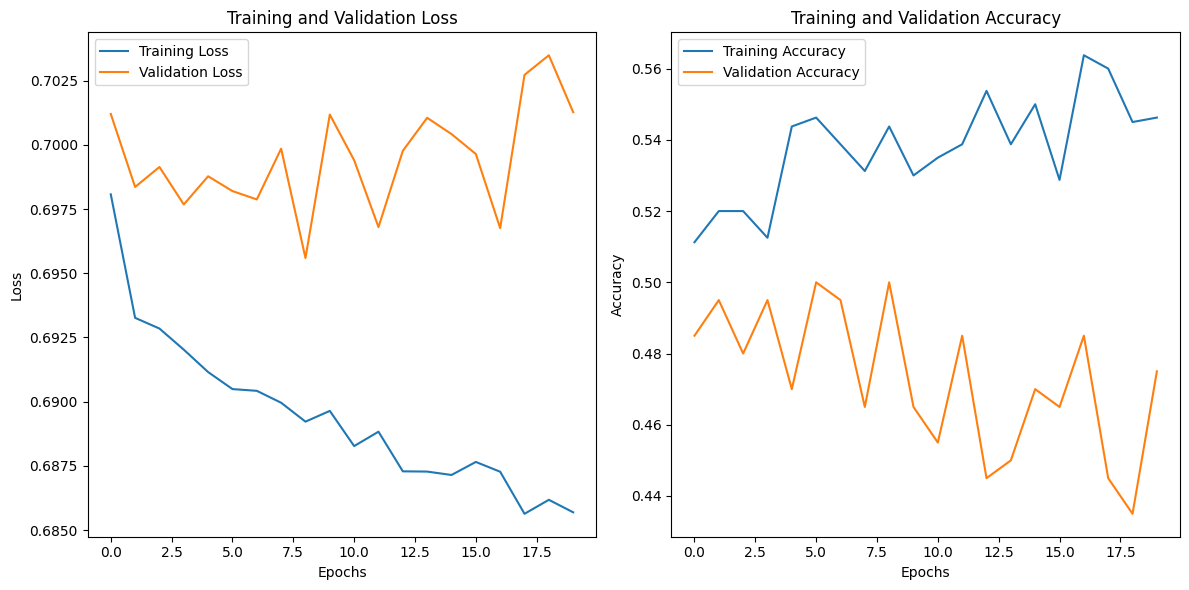

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Define a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Generate some random training data
import numpy as np
X_train = np.random.rand(1000, 10)  # 1000 samples with 10 features
y_train = np.random.randint(2, size=1000)  # 1000 binary labels (0 or 1)

# Train the model and save the history
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Extract training loss and accuracy from the history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


**5. How do you install PyTorch and verify the PyTorch installation?**

In [ ]:
##Using pip
#For CPU-only
pip install torch torchvision torchaudio

#For GPU (with CUDA 11.8)
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

##Using conda
#For CPU-only
conda install pytorch torchvision torchaudio cpuonly -c pytorch
#For GPU (with CUDA 11.8
conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia

#for verifying the installation
import torch
print(torch.__version__)


**6. How do you create a simple neural network in PyTorch ?**

In [ ]:
#Simple Neural Network in PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

#define the neural network
class SimpleNN(nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super(SimpleNN,self).__init__()
    #define layers
    self.fc1=nn.Linear(input_size,hidden_size) #fully connected layer 1
    self.fc2=nn.Linear(hidden_size,output_size) #fully connected layer 2

  def forward(self,x):
  #Define the forward pass
      x = F.relu(self.fc1(x)) #activation after first layer
      x=self.fc2(x)  #output layer
      return x

#Hyperparameters
input_size=2 #Number of input features
hidden_size=4 #number of neuron in hidden layer
output_size=1 #number of output features
learning_rate=0.01
epochs=100

#crate the model
model=SimpleNN(input_size,hidden_size,output_size)

#define loss function and optimizer
criterion=nn.MSELoss() #mean square for regression
optimizer=optim.SGD(model.parameters(),lr=learning_rate)

# Dummy dataset
X = torch.tensor([[1.0, 2.0], [2.0, 3.0], [3.0, 4.0]], dtype=torch.float32)  # Input
y = torch.tensor([[5.0], [7.0], [9.0]], dtype=torch.float32)                # Output

#training the model
for epoch in range(epochs):
  #forward pass
  predictions=model(X)
  loss=criterion(predictions,y)

  #backward pass
  optimizer.zero_grad() #clear previous gradients
  loss.backward()       #copute gradients
  optimizer.step()      #update weigts

  #print loss evry 10 epchs
  if (epoch + 1) % 10 ==0:
    print(f"Epoch [{epoch + 1}/{epochs}], Loss:{loss.item():.4f}")

#test the model
test_input=torch.tensor([[4.0,5.0]],dtype=torch.float32)
test_output=model(test_input)
print(f"prediction for input {test_input.tolist()}:{test_output.item():.4f}")


Epoch [10/100], Loss:0.0940
Epoch [20/100], Loss:0.0814
Epoch [30/100], Loss:0.0705
Epoch [40/100], Loss:0.0611
Epoch [50/100], Loss:0.0533
Epoch [60/100], Loss:0.0465
Epoch [70/100], Loss:0.0405
Epoch [80/100], Loss:0.0353
Epoch [90/100], Loss:0.0308
Epoch [100/100], Loss:0.0269
prediction for input [[4.0, 5.0]]:11.3414


**7. How do you define a loss function and optimizer in PyTorch ?**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Example model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(2, 1)  # Fully connected layer

    def forward(self, x):
        return self.fc(x)

# Create the model
model = SimpleModel()

# Define the loss function (MSELoss for regression)
loss_function = nn.MSELoss()

# Define the optimizer (SGD with learning rate 0.01)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Example data
X = torch.tensor([[1.0, 2.0], [2.0, 3.0], [3.0, 4.0]])  # Input data
y = torch.tensor([[5.0], [7.0], [9.0]])                # Target output

# Forward pass: Predict outputs
predictions = model(X)

# Calculate loss
loss = loss_function(predictions, y)
print("Initial Loss:", loss.item())

# Backward pass: Compute gradients
optimizer.zero_grad()  # Clear gradients from previous step
loss.backward()        # Compute gradients of loss w.r.t. parameters

# Update model parameters
optimizer.step()       # Perform optimization step

# Check updated parameters
print("Updated parameters:", list(model.parameters()))


Initial Loss: 90.91834259033203
Updated parameters: [Parameter containing:
tensor([[-0.2781,  0.2149]], requires_grad=True), Parameter containing:
tensor([0.4912], requires_grad=True)]


**8. How do you implement a custom loss function in PyTorch ?**

In [ ]:
import torch

def custom_mape_loss(predictions, targets):
    """
    Computes Mean Absolute Percentage Error (MAPE)
    :param predictions: Predicted values
    :param targets: True values
    """
    epsilon = 1e-8  # To avoid division by zero
    loss = torch.mean(torch.abs((targets - predictions) / (targets + epsilon)))
    return loss

# Example data
predictions = torch.tensor([2.5, 0.0, 2.1], requires_grad=True)
targets = torch.tensor([3.0, -0.5, 2.0])

# Compute custom loss
loss = custom_mape_loss(predictions, targets)
print("Custom Loss (MAPE):", loss.item())


Custom Loss (MAPE): 0.40555551648139954


**9. How do you save and load a TensorFlow model**

Ans:

In TensorFlow, saving and loading models is an essential step to persist the training process and deploy models into production. TensorFlow provides two main formats for saving and loading models:

SavedModel Format (recommended, default format in TensorFlow 2.0+).
HDF5 Format (legacy format).

In [ ]:
import tensorflow as tf
import os

# Create a simple model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])s

# Ensure the directory exists
save_dir = "saved_model"
os.makedirs(save_dir, exist_ok=True)

# Save the model in .keras format
model.save(f"{save_dir}/my_model.keras")  # Saved to 'saved_model/my_model.keras'

print("Model saved successfully!")


Model saved successfully!


In [ ]:
#>Loading the Model
loaded_model = tf.keras.models.load_model("saved_model/my_model.keras")
print("Model loaded successfully!")



Model loaded successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
